# DATA SCIENCE PROJECT @ THE SPARKS FOUNDATION
# GRIP TASK-2 (UNSUPERVISED ML USING K-MEANS CLUSTERING)
## Author- Keerthi Sai Jahnavi
### Objective: To predict optimum no. of clusters ad represent them visually

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\jahna\OneDrive\Desktop\iris.csv")
print("Data set imported successfully")

Data set imported successfully


In [5]:
# Priting Data set
data.head(11)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##### There are three unique species in the data.So the model would be considered effective if it is able to find out the number of clusters as 3.

##### Data Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = data.iloc[:, 1:5]

scaler.fit(x)
print("Data scaled successfully")
x1 = scaler.transform(x)
x = pd.DataFrame(x1, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

Data scaled successfully


#### Determing the optimum number of clusters using Elbow method

In [9]:
K_rng = range(1,11)
sse =[] #Sum of squared errors
for K in K_rng:
    Km = KMeans(n_clusters = K)
    Km.fit(x)
    sse.append(Km.inertia_)  #Inertia is sum of squared errors. Smaller inertia implies clusters are densed

C:\Users\jahna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


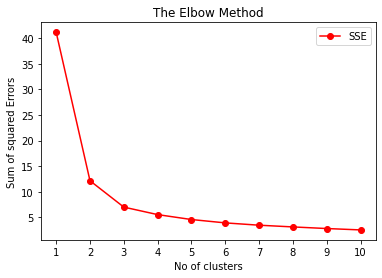

In [12]:
plt.title('The Elbow Method')

plt.plot(list(K_rng),sse, color ='r', label='SSE', marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Sum of squared Errors')
plt.xticks(list(K_rng))
plt.legend()

plt.show()

###### Sum of squared errors doesnot decrease much for the values of K greater than 3. therefore the optimum no. of clusters is 3.

##### Optimum no of clusters = 3

### Clustering

In [13]:
Km = KMeans(n_clusters =3)
x_pred = Km.fit_predict(x.iloc[:, 0:4])
x['clusters']=x_pred

# now creating a separate data frames with clusters
xa = x[x.clusters==0]
xb = x[x.clusters==1]
xc = x[x.clusters==2]
centroid1= Km.cluster_centers_

#### Visualising Clusters

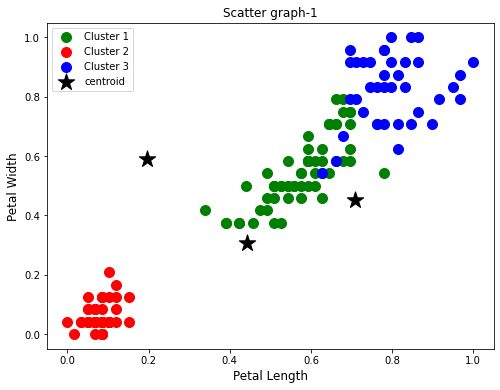

In [15]:
# Creating scatter plot of clusters

plt.figure(figsize=(8,6))
plt.title('Scatter graph-1')
plt.scatter(xa['PetalLengthCm'], xa['PetalWidthCm'], s=100, c='g', label='Cluster 1')
plt.scatter(xb['PetalLengthCm'], xb['PetalWidthCm'], s=100, c='r', label='Cluster 2')
plt.scatter(xc['PetalLengthCm'], xc['PetalWidthCm'], s=100, c='b', label='Cluster 3')
plt.scatter(centroid1[:, 0], centroid1[: , 1], s= 300, c='black', marker='*', label='centroid')

plt.xlabel("Petal Length", size='large')
plt.ylabel("Petal Width", size='large')
plt.legend()
plt.show()

##### similarly we can create scatter plot of sepal width

In [20]:
Km1 = KMeans(n_clusters =3 )
y_pred= Km1.fit_predict(x.iloc[:, 0:2])
x['clusters_2']= y_pred
# now creating a separate data frames with clusters
ya = x[x.clusters_2==0]
yb = x[x.clusters_2==1]
yc = x[x.clusters-2==2]
centroid2= Km1.cluster_centers_
centroid2

array([[0.19897959, 0.60034014],
       [0.69562648, 0.45390071],
       [0.40483539, 0.28009259]])

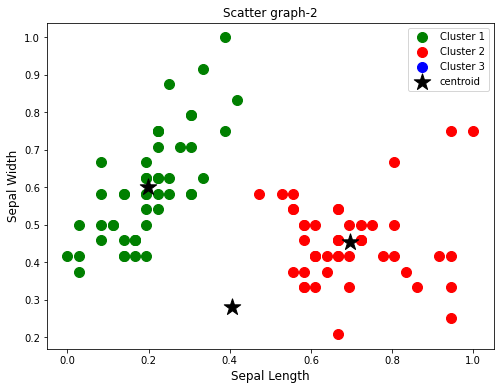

In [23]:
# creating scatterplot of clusters

plt.figure(figsize=(8,6))
plt.title('Scatter graph-2')
plt.scatter(ya['SepalLengthCm'], ya['SepalWidthCm'], s=100, c='g', label='Cluster 1')
plt.scatter(yb['SepalLengthCm'], yb['SepalWidthCm'], s=100, c='r', label='Cluster 2')
plt.scatter(yc['SepalLengthCm'], yc['SepalWidthCm'], s=100, c='b', label='Cluster 3')
plt.scatter(centroid2[:, 0], centroid2[:, 1], s=300, c='black', marker='*', label='centroid')
           
plt.xlabel("Sepal Length", size='large')
plt.ylabel("Sepal Width", size='large')
plt.legend()
plt.show()

### 3D- Visualization

<IPython.core.display.Javascript object>


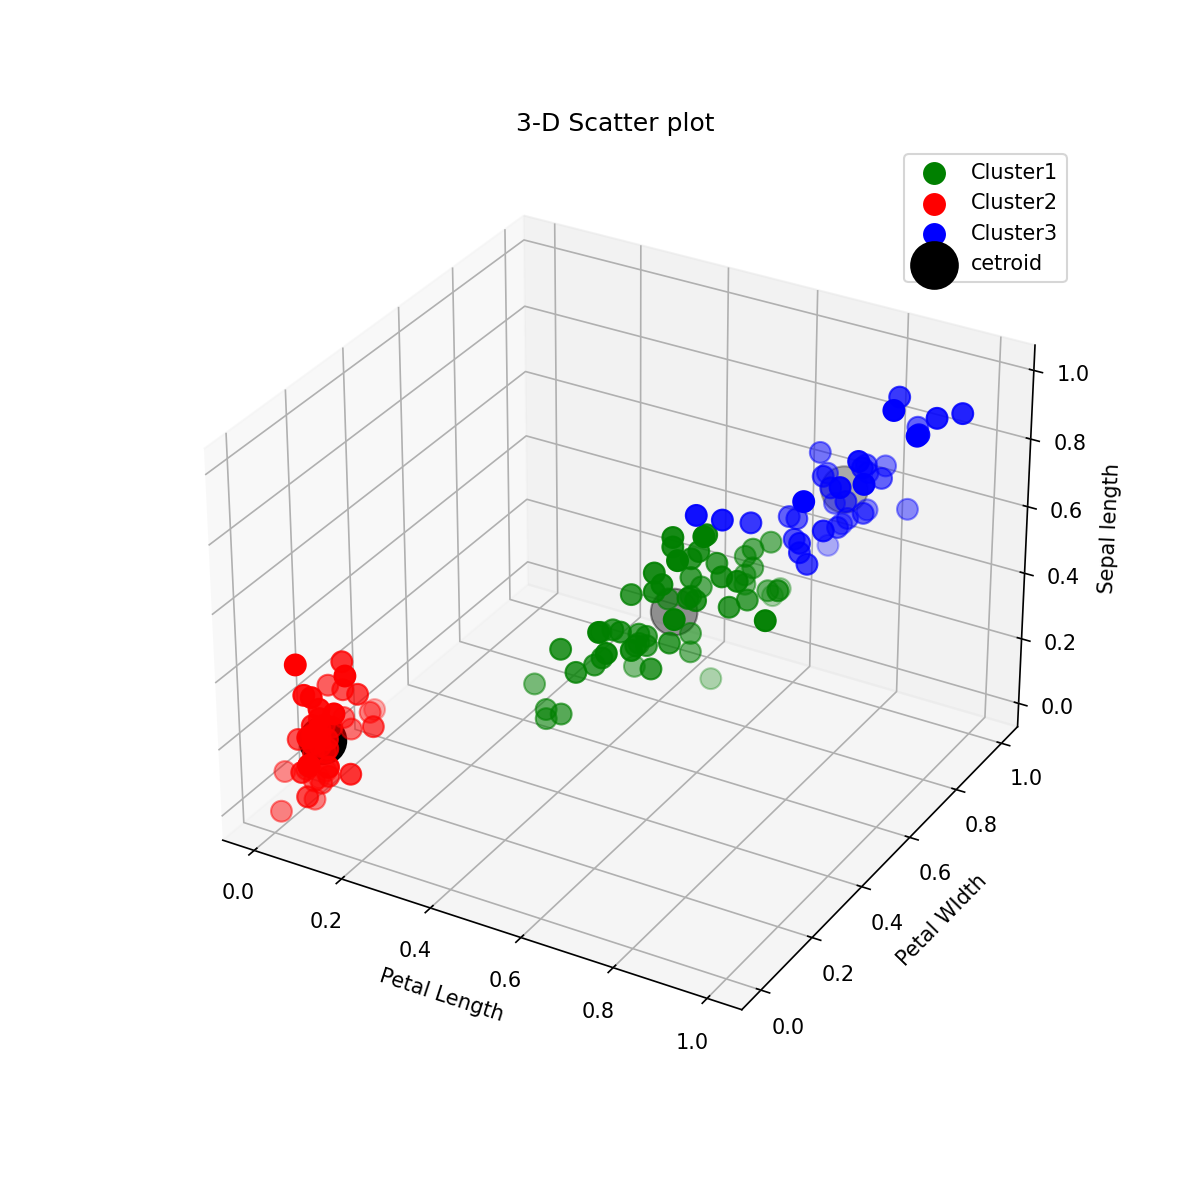

In [26]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection='3d')
ax.scatter(xa['PetalLengthCm'], xa['PetalWidthCm'], xa['SepalLengthCm'], s=100, c='g', label='Cluster1')
ax.scatter(xb['PetalLengthCm'], xb['PetalWidthCm'], xb['SepalLengthCm'], s=100, c='r', label='Cluster2')
ax.scatter(xc['PetalLengthCm'], xc['PetalWidthCm'], xc['SepalLengthCm'], s=100, c='b', label='Cluster3')
ax.scatter(centroid1[:, 2], centroid1[:, 3], centroid1[:, 0], s=500, c='black', marker='o', label='cetroid')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal WIdth')
ax.set_zlabel('Sepal length')
ax.set_title('3-D Scatter plot')

ax.legend()

plt.show()